<a href="https://colab.research.google.com/github/Caroline-Camargo/TrabalhosFerramentasDeInteligenciaArtificial/blob/main/Tarefa6_Algoritmos_Gen%C3%A9ticos_DEAP_Caroline_Souza_Camargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEAP Introdução
---
![image](https://deap.readthedocs.io/en/master/_images/deap_long.png)

* Distributed Evolutionary Algorithm in Python  is a evolutionary computation framework for rapid prototyping and testing of ideas.

* [DEAP](https://github.com/DEAP/deap) (Distributed Evolutionary Algorithm in Python) é um framework de computação evolutiva para prototipagem rápida e teste de ideias.

## Material Teórico Algoritmos Genéticos

* Youtube: [Genetic Algorithms by Example](https://www.youtube.com/watch?v=uQj5UNhCPuo)

* Medium: [Genetic Algorithms From Theory to Practice](https://medium.com/@atbender/from-theory-to-practice-designing-genetic-algorithms-to-solve-complex-optimization-problems-cbb2ae44296)

* Book: [Introduction to Genetic Algorithms -- Melanie Mitchell](https://www.boente.eti.br/fuzzy/ebook-fuzzy-mitchell.pdf)


## Instalando DEAP

In [62]:
!pip install deap

In [63]:
import warnings

# Estamos suprimindo um warning do DEAP que pode dificultar a visualização dos resultados
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Fitness

* Para definir funções de fitness, usamos `creator.create()`.

* A função `create()` recebe três argumentos: um nome para a nova classe criada, uma classe base e o atributo de pesos.

* A classe de fitness requer um parâmetro de pesos, que descreve os objetivos.

* O atributo de pesos deve ser uma tupla para que fitness de múltiplos objetivos e de objetivo único possam ser tratadas da mesma maneira.

* Abaixo, definimos uma função de maximização de objetivo único:

* Observe que tuplas de um único elemento em Python são definidas com uma vírgula no final.

In [64]:
from deap import base, creator

creator.create("Fitness", base.Fitness, weights=(1.0,))

* Uma fitness de minimização é construída usando pesos negativos, enquanto uma fitness de maximização tem pesos positivos.

* Podemos facilmente definir uma função de aptidão que maximize o primeiro objetivo e minimize o segundo.

In [65]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))

* Os pesos podem ser usados para variar a importância de cada objetivo em relação aos outros.

In [66]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -2.0, 0.4, 1000.0))

## Indivíduo

* A forma como os indivíduos são definidos impacta fortemente um algoritmo genético.

* Indivíduos podem ser criados usando o `creator` e inicializados usando uma `Toolbox`.

* Vamos definir um indivíduo com 10 atributos de ponto flutuante e inicializá-lo aleatoriamente.

In [67]:
import random

from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

toolbox.individual()

[0.8341073741990507,
 0.554864298845592,
 0.7628340249622038,
 0.6501469077188133,
 0.1149027675086629,
 0.27868001287227706,
 0.5093711167646309,
 0.40858880807152576,
 0.662466730132052,
 0.1530223197069035]

* Da mesma forma, podemos alterar a função `random` para criar um indivíduo de permutação.

In [68]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

IND_SIZE=10

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
toolbox.register("individual_sample",
                 tools.initIterate,
                 creator.Individual,
                 toolbox.indices)

print(toolbox.individual_sample())
print(toolbox.individual_sample())

[8, 5, 0, 6, 3, 4, 1, 9, 2, 7]
[0, 8, 9, 1, 7, 6, 4, 2, 3, 5]


## População

* Populações são coleções de indivíduos.

In [69]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual_sample)
print(toolbox.population(n=5))
print(toolbox.population(n=5))

[[0, 9, 6, 2, 1, 8, 3, 4, 5, 7], [5, 8, 3, 1, 9, 0, 2, 7, 4, 6], [4, 3, 0, 2, 6, 7, 5, 9, 1, 8], [1, 5, 3, 0, 4, 6, 8, 2, 9, 7], [9, 2, 8, 5, 6, 1, 7, 4, 3, 0]]
[[4, 7, 1, 6, 3, 9, 2, 8, 5, 0], [2, 9, 4, 8, 1, 6, 7, 3, 5, 0], [2, 7, 5, 3, 6, 8, 9, 4, 1, 0], [4, 6, 9, 7, 5, 1, 3, 8, 0, 2], [3, 9, 7, 2, 1, 5, 6, 0, 4, 8]]


* Outros tipos notáveis de população incluem [Grade](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#grid), [Enxame](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#swarm) e [Demes](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#demes).

## Avaliação

![image](https://www.researchgate.net/publication/316514846/figure/fig1/AS:487714714853376@1493291657451/Genetic-Algorithm-Evaluation-Flow.png)

* Ao inspecionar a avaliação de aptidão dos nossos indivíduos, podemos ver que sua avaliação permanece indefinida até que a alteremos.

In [70]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

individual = toolbox.individual()

print(individual)
print(individual.fitness.valid)
print(individual.fitness.values)

[0.7053531478816893, 0.5014089016897609, 0.7470262154288041, 0.012001401926812094, 0.6266443584550732, 0.8345427149127239, 0.5538775385930216, 0.19380024138295948, 0.19146604542130896, 0.6333005860582546]
False
()


* Aqui vamos criar uma avaliação que é simplesmente a soma de todos os atributos do indivíduo.

* Lembre-se de que a avaliação de aptidão dos indivíduos precisa ser uma tupla pelos mesmos motivos discutidos anteriormente.

In [71]:
def evaluate(individual):
    return (sum(individual),)

individual.fitness.values = evaluate(individual)

print(individual.fitness.valid)
print(individual.fitness)

True
(4.999421151750409,)


## Mutação

![image](https://www.researchgate.net/publication/272093243/figure/fig8/AS:329956690284546@1455679213204/Mutation-operators-applied-to-chromosomes-in-the-proposed-genetic-algorithm.png)

* Existem diversos operadores de mutação no módulo `deap.tools`.

* A regra geral para operadores de mutação é que eles apenas mutam.

* Uma cópia independente deve ser feita antes de mutar o indivíduo original se o indivíduo original precisar ser mantido.

* Para aplicar uma mutação (aqui uma mutação gaussiana), simplesmente utilize a função desejada.

In [72]:
mutant = toolbox.clone(individual)
mutant, = tools.mutGaussian(mutant, mu=0.0, sigma=0.2, indpb=0.2)

del mutant.fitness.values

print(individual)
print(mutant)

[0.7053531478816893, 0.5014089016897609, 0.7470262154288041, 0.012001401926812094, 0.6266443584550732, 0.8345427149127239, 0.5538775385930216, 0.19380024138295948, 0.19146604542130896, 0.6333005860582546]
[0.7053531478816893, 0.7620762463353035, 0.7470262154288041, -0.011951979395872475, 0.6433875149746874, 0.8345427149127239, 0.5538775385930216, 0.19380024138295948, 0.19146604542130896, 0.6333005860582546]


* Os valores de aptidão são deletados porque não estão mais relacionados ao indivíduo.

* A mutação não é responsável por invalidar a aptidão.

## Crossover

![image](https://d3i71xaburhd42.cloudfront.net/73a50124700c7b2e44e3a72a298f6279a8b54ac3/13-Figure2-1.png)

* Existem diversos operadores de crossover na [documentação](https://deap.readthedocs.io/en/master/api/tools.html#module-deap.tools).

* A regra geral para operadores de crossover é que eles apenas cruzam indivíduos.

* Cópias independentes devem ser feitas antes de cruzar os indivíduos originais se os indivíduos originais precisarem ser mantidos.

* Abaixo aplicamos uma operação de crossover para produzir os dois filhos que são clonados antecipadamente.

In [73]:
individual1, individual2 = toolbox.individual(), toolbox.individual()

print(individual1)
print(individual2)

child1, child2 = [toolbox.clone(ind) for ind in (individual1, individual2)]
tools.cxOnePoint(child1, child2)

del child1.fitness.values
del child2.fitness.values

print(child1)
print(child2)

[0.6508041489349233, 0.06702620477503418, 0.31640567621083016, 0.14047941136098874, 0.5224944725571626, 0.5922873414896651, 0.9345151255792221, 0.32295755415709726, 0.6342431513042546, 0.761035645656321]
[0.9222147777672254, 0.05637798244370307, 0.13751778476461252, 0.9170170402098936, 0.6629823476728732, 0.5627790786407588, 0.5829751219937128, 0.13914019232803188, 0.006004207396274164, 0.3565869578335341]
[0.6508041489349233, 0.06702620477503418, 0.31640567621083016, 0.9170170402098936, 0.6629823476728732, 0.5627790786407588, 0.5829751219937128, 0.13914019232803188, 0.006004207396274164, 0.3565869578335341]
[0.9222147777672254, 0.05637798244370307, 0.13751778476461252, 0.14047941136098874, 0.5224944725571626, 0.5922873414896651, 0.9345151255792221, 0.32295755415709726, 0.6342431513042546, 0.761035645656321]


## Seleção

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Vxs3KzHbOpyEREA2Vo0WVA.jpeg)

* A seleção é feita entre uma população.

* Vários operadores de seleção estão disponíveis no módulo `deap.tools`.

* Ele retorna uma lista contendo as referências para os indivíduos selecionados.

In [74]:
selected = tools.selBest([child1, child2], 1)
print(child1 in selected)
print(child2 in selected)

True
False


* Normalmente, uma duplicação da população inteira é feita após a seleção.

In [75]:
offspring = [toolbox.clone(ind) for ind in selected]

## Toolbox and Algorithms

* Definindo objetivo e indivíduos:

In [76]:
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE = 10

toolbox = base.Toolbox()

toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

* Definindo avaliação e registrando operadores genéticos:

In [77]:
def evaluateInd(individual):
    return (sum(individual),)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluateInd)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

* Loop básico do algoritmo genético:

In [78]:
GENERATION_AMOUNT = 10
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.02

pop = toolbox.population(n=300)

for g in range(GENERATION_AMOUNT):
    offspring = toolbox.select(pop, len(pop))

    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CROSSOVER_PROBABILITY:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTATION_PROBABILITY:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    fitnesses_values = list(map(lambda x: x[0], fitnesses))
    generation_average_fitness = sum(fitnesses_values) / len(fitnesses_values)
    print(f"Generation fitness: {generation_average_fitness:6.5f}")

    pop[:] = offspring

Generation fitness: 4.99599
Generation fitness: 4.14239
Generation fitness: 3.61467
Generation fitness: 3.07519
Generation fitness: 2.51155
Generation fitness: 1.74010
Generation fitness: 0.82729
Generation fitness: -0.16071
Generation fitness: -1.18370
Generation fitness: -2.12927


* Uma variação disso é usar `algorithms.varAnd`, que abstrai os operadores de variabilidade:

In [79]:
from deap import algorithms

GENERATION_AMOUNT = 10
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.02

pop = toolbox.population(n=300)

for g in range(GENERATION_AMOUNT):
    offspring = map(toolbox.clone, toolbox.select(pop, len(pop)))

    offspring = algorithms.varAnd(offspring,
                                  toolbox,
                                  CROSSOVER_PROBABILITY,
                                  MUTATION_PROBABILITY)

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    fitnesses_values = list(map(lambda x: x[0], fitnesses))
    generation_average_fitness = sum(fitnesses_values) / len(fitnesses_values)
    print(f"Generation fitness: {generation_average_fitness:6.5f}")

    pop[:] = offspring

Generation fitness: 4.99208
Generation fitness: 4.25655
Generation fitness: 3.65933
Generation fitness: 3.17280
Generation fitness: 2.67435
Generation fitness: 2.35940
Generation fitness: 1.77905
Generation fitness: 1.12088
Generation fitness: 0.34552
Generation fitness: -0.56298


* Podemos simplificar ainda mais usando `algorithms.eaSimple`:

In [80]:
pop = toolbox.population(n=300)
population, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10)

gen	nevals
0  	300   
1  	180   
2  	176   
3  	169   
4  	179   
5  	188   
6  	160   
7  	171   
8  	197   
9  	189   
10 	165   


* Note que tais abstrações nos dão menos liberdade para registrar a aptidão das gerações.

* Neste formato, precisamos definir uma estatística e registrar métricas para salvar no logbook.

* Consulte a [documentação](https://deap.readthedocs.io/en/master/_modules/deap/algorithms.html#eaSimple).

In [81]:
stats = tools.Statistics(key=lambda fits: fits[0])
stats.register("avg", lambda fits: sum(fits) / len(fits))

logbook = tools.Logbook()

pop = toolbox.population(n=300)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10,
                                          stats=stats, halloffame=None, verbose=True)

gen	nevals	avg      
0  	0     	-0.754129
1  	177   	-0.914002
2  	168   	-1.30761 
3  	169   	-1.59321 
4  	182   	-1.95561 
5  	161   	-2.32205 
6  	176   	-2.42998 
7  	157   	-2.62994 
8  	178   	-2.94773 
9  	193   	-3.1888  
10 	180   	-3.37273 


## Exemplo de Problema Prático

Vamos projetar um algoritmo genético para resolver uma instância do Problema do Caixeiro Viajante (Traveling Salesman Problem - TSP).

As coordenadas das cidades são: (0, 0), (1, 1), (2, 0), (1, -1).

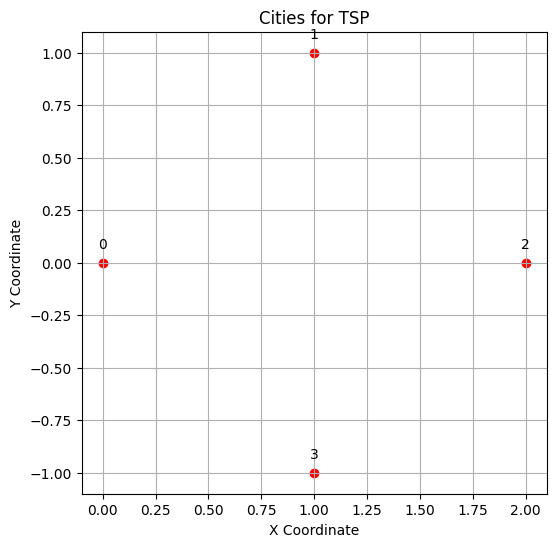

In [82]:
import matplotlib.pyplot as plt

cities = [(0, 0), (1, 1), (2, 0), (1, -1)]

x_coords, y_coords = zip(*cities)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color="red")

for i, (x, y) in enumerate(cities):
    plt.annotate(f"{i}", (x, y), textcoords="offset points", xytext=(0,10), ha="center")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Cities for TSP")

plt.grid(True)
plt.show()

Antes de ler sobre a solução, como você modelaria os atributos do indivíduo para este problema?

### Solução

* Definimos a instância do problema usando as coordenadas das cidades.

* Definimos o cálculo da distância.

* Projetamos a função de avaliação que itera sobre as cidades e calcula suas distâncias.

* Definimos os indivíduos e os operadores genéticos. Aqui, nossos indivíduos são sequências de cidades.

* Rodamos o algoritmo genético.

In [83]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

cities = [(0, 0), (1, 1), (2, 0), (1, -1)]

def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def evalTSP(individual):
    total_distance = sum(distance(cities[individual[i]], cities[individual[i + 1]]) for i in range(len(individual) - 1))
    total_distance += distance(cities[individual[-1]], cities[individual[0]])  # Return to start
    return (total_distance,)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalTSP)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=False)

best_ind = tools.selBest(population, 1)[0]
best_route = [cities[i] for i in best_ind]

print(f"Best route is {best_route} with total distance {best_ind.fitness.values[0]}")

Best route is [(1, -1), (2, 0), (1, 1), (0, 0)] with total distance 5.656854249492381


# Exercícios
---

Abaixo você pode encontrar alguns exercícios para praticar o uso do framework.

## Exercício 1

No contexto dos exemplos acima, considere o seguinte:
* A aptidão é a soma dos atributos do indivíduo.
* Seus atributos são instanciados por `random.random()`.
* `random.random()` não retorna números negativos.

Como as médias de aptidão das gerações podem ser valores negativos?

In [84]:
all([random.random() > 0 for i in range(10_000)])

True



*   Fit
*   Seleção
*   Recombinação
*   Mutação (pode gerar número negativo)




```
1  |  3  |  5  |  7
8  |  6  |  8  |  5

1  |  3  |  2  |  -4
8  |  -6 |  5  |  4

1  |  3  |  5  |  7
8  |  -6 |  8  |  -4
```


No código está sendo utilizado tools.mutGaussian, o que indica que a mutação segue uma distribuição normal (Gaussiana) com média zero e desvio padrão um. Isso pode gerar valores negativos.
Em vez de usar uma distribuição normal, pode se optar por um outro tipo de mutação que nunca gere valores negativos. Como criar uma função de mutação que substitui o valor de um gene por um novo valor aleatório dentro de um intervalo específico

Vale ressaltar que isso só acontece porque está se usando uma função de minização, já que o objetivo do problema é minimizar o valor da função de aptidão. Isso pode levar a situações onde, se a mutação ou outras operações resultam em valores negativos, eles são interpretados como uma melhoria na aptidão, pois são menores do que os valores positivos.

## Exercício 2

Crie um algoritmo genético para resolver o seguinte problema:

Os indivíduos devem ser permutações dos números [0,1,2,3,4,5,6,7,8,9]. A função objetivo é contar quantos números estão na posição correta (ordem crescente).

In [85]:
numeros = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [86]:
def evalPermutacao(individual):
  posicoesCorretas = 0
  i = 0
  for num in individual:
    if i == num:
      posicoesCorretas += 1
    i += 1
  return (posicoesCorretas,)

In [87]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(numeros)), len(numeros))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalPermutacao)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=False)

best_ind = tools.selBest(population, 1)[0]
best_permutacao = [numeros[i] for i in best_ind]

print(f"Melhor permutação é {best_permutacao}: {best_ind.fitness.values[0]}")

Melhor permutação é [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 10.0


## Exercício 3

Crie um algoritmo genético para resolver o seguinte problema:

Maximize a função `𝑓(𝑥,𝑦) = 𝑥 ⋅ 𝑦`, onde `x` e `y` são números de ponto flutuante no intervalo [0, 10].

Use diferentes operadores genéticos (seleção, crossover, mutação) dos utilizados nos exercícios anteriores.

In [88]:
def evalFunc(individual):
    x, y = individual
    return (x * y,)

In [89]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 10)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_float, toolbox.attr_float))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalFunc)

def cxBlendModificado(ind1, ind2, alpha): #https://deap.readthedocs.io/en/master/_modules/deap/tools/crossover.html#cxBlend
    for i, (x1, x2) in enumerate(zip(ind1, ind2)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i] = (1. - gamma) * x1 + gamma * x2
        ind2[i] = gamma * x1 + (1. - gamma) * x2
        ind1[i] = min(max(ind1[i], 0.0), 10.0)
        ind2[i] = min(max(ind2[i], 0.0), 10.0)
    return ind1, ind2

toolbox.register("mate", cxBlendModificado, alpha=0.5)  # Crossover para indivíduos de números de ponto flutuante
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=10, eta=1.0, indpb=0.2)  # Mutação Gaussiana espera uma sequência composta de atributos com valor real
toolbox.register("select", tools.selRoulette)  # Seleção por Roleta

population = toolbox.population(n=50)
print(population)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=False)

best_ind = tools.selBest(population, 1)[0]
print(f"Melhor individuo é {best_ind}: {best_ind.fitness.values[0]}")


[[6.187462404186355, 3.434471314424435], [7.817909158184948, 0.18497960199253316], [5.3387570428149225, 2.822086742444382], [9.56969478852661, 0.32290723723263026], [3.679289555039067, 6.203797534360066], [1.010376050745606, 1.4225644812514515], [5.361525077623225, 3.5174897297555594], [2.252567887514836, 8.968711070801684], [2.8169830580366884, 7.906279172639371], [3.09237267457363, 4.723492446826505], [8.039670929524359, 6.650465469317977], [7.192390934726118, 7.906076333380253], [8.579726652530345, 4.645284724915247], [8.354785083474622, 8.575412942626983], [8.522248629076866, 2.5968197390969214], [0.20676983299815266, 3.929715147755589], [3.2881865095894836, 5.590104775518792], [9.651508053918171, 7.417998597463496], [2.8946190454675556, 7.440109366931527], [9.929101986630561, 6.602362930750417], [3.8582159613974474, 5.426249611472347], [2.3806635554473345, 7.54213505300267], [9.610133052132854, 3.6254552237249382], [1.3387741633120964, 6.6734024141824175], [3.318526121452605, 2.06

## Exercício 4

Crie um algoritmo genético multi-objetivo para resolver o seguinte problema:

Os indivíduos devem ser uma lista de `20` números de ponto flutuante no intervalo `[0,1]`.

Minimize a soma dos índices pares enquanto maximiza a soma dos índices ímpares nesta lista. Minimizar os índices pares é duas vezes mais importante do que minimizar os índices ímpares.

Use diferentes operadores genéticos (seleção, crossover, mutação) dos utilizados nos exercícios anteriores.

In [90]:
def evalFunc(individual):
    sum_pares = 0
    sum_impares = 0
    i = 0
    for num in individual:
        if i % 2 == 0:
            sum_pares += num
        else:
            sum_impares += num
        i += 1
    return (sum_pares, sum_impares)

In [91]:
creator.create("FitnessMulti", base.Fitness, weights=(-2.0,1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=20)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalFunc)
toolbox.register("mate", tools.cxTwoPoints)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=1, eta=1.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=1000, verbose=False)

best_ind = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo é {best_ind}")
print(f"Fitness da minimização dos índices pares: {best_ind.fitness.values[0]}")
print(f"Fitness da maximização dos índices ímpares: {best_ind.fitness.values[1]}")


/usr/local/lib/python3.10/dist-packages/deap/tools/crossover.py:67: FutureWarning: tools.cxTwoPoints has been renamed. Use cxTwoPoint instead.
  warnings.warn("tools.cxTwoPoints has been renamed. Use cxTwoPoint instead.",


Melhor indivíduo é [0.0014583535044585538, 0.9998841234383389, 0.0011327643570929746, 0.995479460522226, 0.02168350980517153, 0.03875450049368889, 0.35449005030348546, 0.8618207183771623, 0.00058227045773529, 0.0528312423752092, 0.015349555811806082, 0.9195199147872858, 0.17944291395206313, 0.7594949820972294, 0.5260933692010464, 0.6314589000789373, 0.30346530481992984, 0.37686601879611425, 0.21033134864074055, 0.24983181841593094]
Fitness da minimização dos índices pares: 1.6140294408535298
Fitness da maximização dos índices ímpares: 5.885941679382123


## Exercício 5

Escolha uma das implementações anteriores do algoritmo genético, registre a aptidão média ao longo das gerações e plote em um gráfico.

In [92]:
def saveStatistics(individual):
  return (individual.fitness.values)

In [97]:
import matplotlib.pyplot as plt

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalTSP)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

aptidaoMedia = tools.Statistics(saveStatistics)
aptidaoMedia.register("mean", np.mean)

result, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=300,  verbose=True, stats=aptidaoMedia)

best_ind = tools.selBest(population, 1)[0]
best_route = [cities[i] for i in best_ind]

print(f"Best route is {best_route} with total distance {best_ind.fitness.values[0]}")

gen	nevals	mean   
0  	50    	6.54725
1  	33    	6.07862
2  	41    	5.86774
3  	37    	5.9146 
4  	35    	5.70372
5  	37    	5.86774
6  	35    	5.9146 
7  	45    	5.89117
8  	35    	5.79744
9  	42    	6.05519
10 	35    	5.86774
11 	40    	5.9146 
12 	30    	5.70372
13 	32    	5.79744
14 	42    	5.82087
15 	43    	5.75058
16 	35    	5.9146 
17 	42    	6.05519
18 	39    	5.98489
19 	34    	5.86774
20 	34    	5.9146 
21 	38    	5.82087
22 	40    	5.84431
23 	29    	5.70372
24 	34    	5.77401
25 	33    	5.89117
26 	35    	5.79744
27 	46    	5.84431
28 	43    	5.72715
29 	37    	5.70372
30 	36    	5.70372
31 	37    	5.75058
32 	40    	5.77401
33 	31    	5.75058
34 	36    	5.89117
35 	41    	5.72715
36 	34    	5.70372
37 	38    	5.72715
38 	43    	5.86774
39 	37    	5.72715
40 	42    	5.72715
41 	36    	5.70372
42 	39    	5.68029
43 	40    	5.70372
44 	38    	5.68029
45 	38    	5.68029
46 	41    	5.68029
47 	34    	5.72715
48 	27    	5.65685
49 	33    	5.65685
50 	38    	5.82087
51 	34    	5

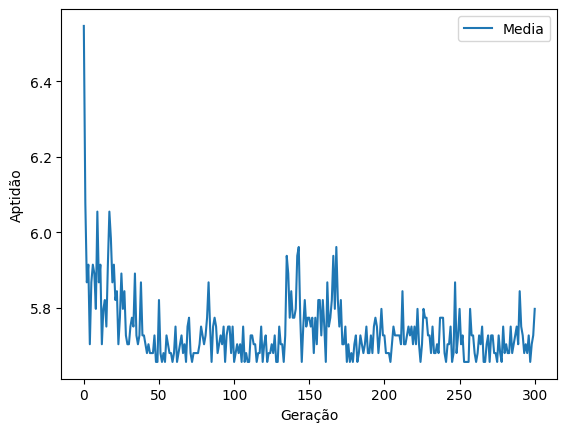

In [98]:
media = log.select("mean")
plt.plot(media, label="Media")
plt.xlabel("Geração")
plt.ylabel("Aptidão")
plt.legend()